In [131]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import cufflinks as cf

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, auc
from sklearn import metrics

import xgboost
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

import mlflow
import shap

# Exploratory data analysis

In [ ]:
os.chdir("..")

In [206]:
df = pd.read_csv('data/raw/application_train.csv.zip')
df.shape

(307511, 122)

In [192]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [194]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

In [195]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [196]:
# checking missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


c:\Users\henri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




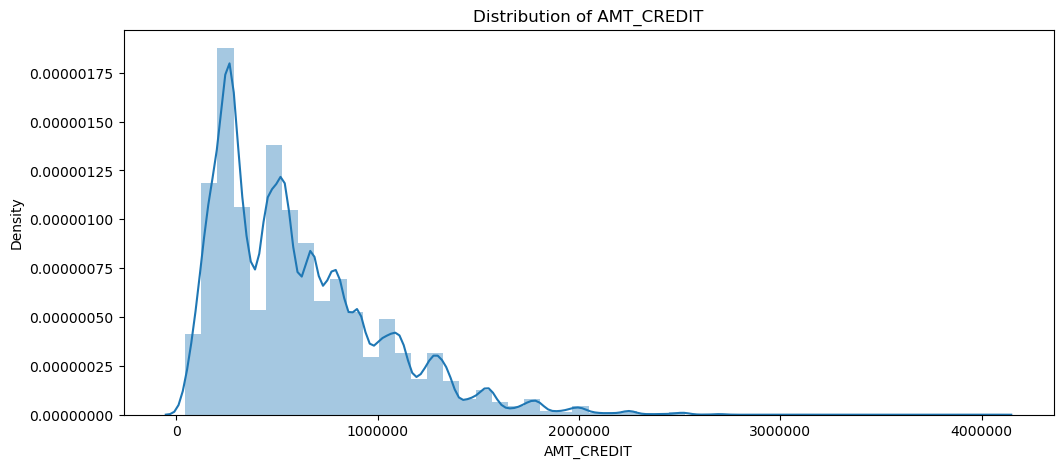

In [197]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df["AMT_CREDIT"])

In [207]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

temp = df["TARGET"].value_counts()
temp_plot = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
temp_plot.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

In [209]:
temp = df["NAME_CONTRACT_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [212]:
temp = df["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan', color = 'green')

In [213]:
temp = df["ORGANIZATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Organization Name', yTitle = "Count", title = 'Types of Organizations who applied for loan ', color = 'red')

In [151]:
correlation_with_target = df.corr()['TARGET'].sort_values(ascending=False)
correlation_with_target.head(20)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
Name: TARGET, dtype: float64

In [152]:
correlation_with_target = df.corr()['TARGET'].sort_values(ascending=True)
correlation_with_target.head(20)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
TOTALAREA_MODE               -0.032596
ELEVATORS_MODE               -0.032131
LIVINGAREA_MODE              -0.030685
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64

# Data preprocessing

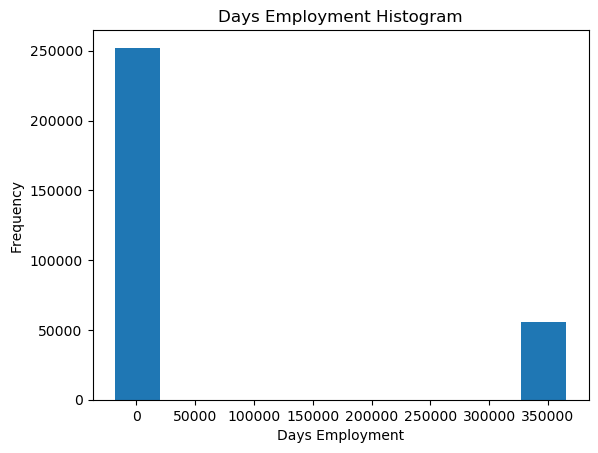

In [215]:
# Outliers
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment');

In [216]:
df[df["DAYS_EMPLOYED"] == 365243].count()

SK_ID_CURR                    55374
TARGET                        55374
NAME_CONTRACT_TYPE            55374
CODE_GENDER                   55374
FLAG_OWN_CAR                  55374
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     47711
AMT_REQ_CREDIT_BUREAU_WEEK    47711
AMT_REQ_CREDIT_BUREAU_MON     47711
AMT_REQ_CREDIT_BUREAU_QRT     47711
AMT_REQ_CREDIT_BUREAU_YEAR    47711
Length: 122, dtype: int64

In [217]:
df = df[df["DAYS_EMPLOYED"] != 365243]
df.shape

(252137, 122)

# Feature engineering

In [153]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [154]:
# one-hot encoding of categorical variables
df = pd.get_dummies(df)

print('New shape: ', df.shape)

New shape:  (307511, 243)


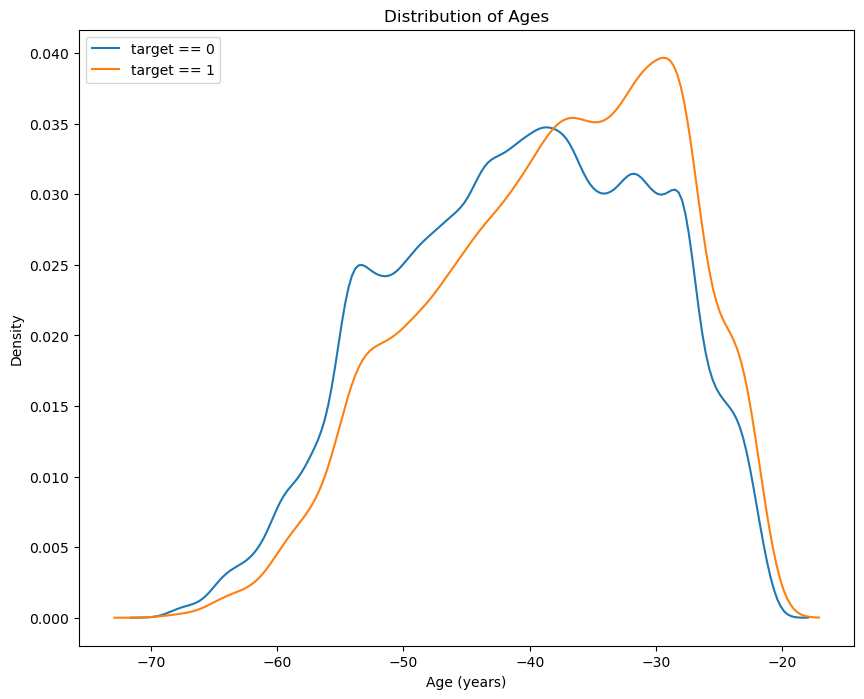

In [158]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend(loc="upper left")
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

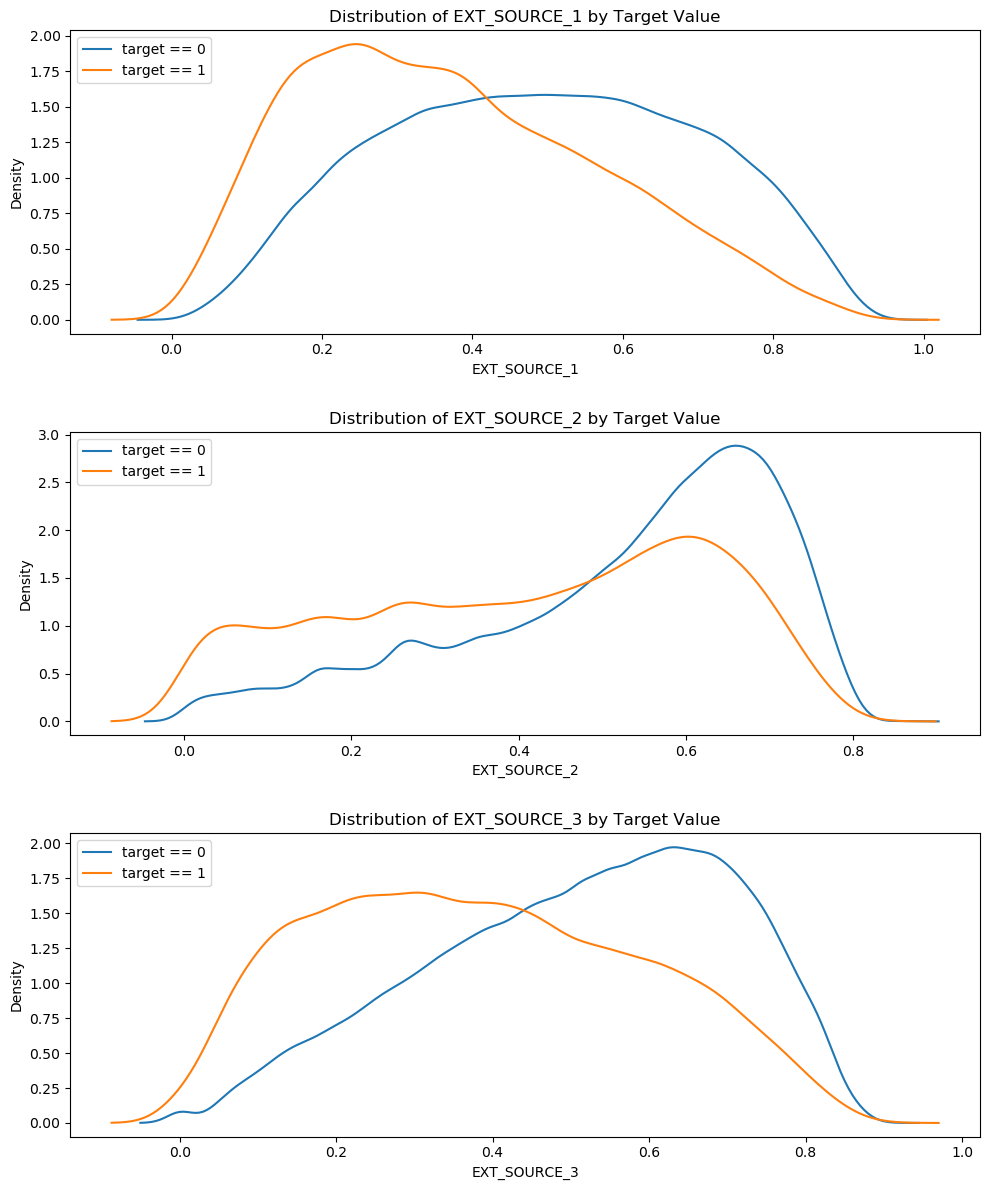

In [159]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')
    plt.legend(loc="upper left")
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [160]:
X = df.drop(['TARGET'], axis='columns')
y = df['TARGET']

# Median imputation of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X)
X = imputer.transform(X)

print('Training data shape: ', X.shape)

Training data shape:  (252137, 242)


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training

In [218]:
#Random Forest
rf = RandomForestClassifier(random_state=0, n_estimators=450, n_jobs=-1)
rf.fit(X_train, y_train)
rf_y_pred = (rf.predict_proba(X_test) <= 0.84)[:,0].astype(int)

#Confusion matrix & precision, accuracy
balanced_accuracy_rf = balanced_accuracy_score(y_test, rf_y_pred)
print("Balanced accuracy : ", balanced_accuracy_rf)

rf_a, rf_b, _ = roc_curve(y_test, rf_y_pred)
print("AUC_rf : ", metrics.auc(rf_a, rf_b), '\n')

print("Check proportion on target (should be around 8%): ", rf_y_pred.sum()/len(rf_y_pred))

Balanced accuracy :  0.6338367692806679
AUC_rf :  0.6338367692806679 

Check proportion on target (should be around 8%):  0.1513841516617752


In [183]:
#XGBoost
mlflow.xgboost.autolog()

xgb = xgboost.XGBClassifier(learning_rate =0.15,
 n_estimators=300,
 max_depth=8,
 n_jobs=-1,
 random_state=0)

""" scale_pos_weight=1,
 min_child_weight=1,
 gamma=0.00,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 booster="gbtree" """ 
 
xgb.fit(X_train, y_train)
xgb_y_pred = (xgb.predict_proba(X_test) <= 0.786)[:,0].astype(int)
#Confusion matrix & precision, accuracy
xgb_conf = confusion_matrix(y_test, xgb_y_pred)
print("confusion_matrix XGB_sk_learn :\n", xgb_conf, '\n')

balanced_accuracy_xgb = balanced_accuracy_score(y_test, xgb_y_pred)
print("Balanced accuracy : ", balanced_accuracy_xgb)

xgb_a, xgb_b, _ = roc_curve(y_test, xgb_y_pred)
print("AUC_xgb : ", metrics.auc(xgb_a, xgb_b), '\n')

print("Check proportion on target (should be around 8%): ", xgb_y_pred.sum()/len(xgb_y_pred))

2023/01/30 22:32:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.
2023/01/30 22:32:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6104823ac050473c8f62bb673552fa77', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


confusion_matrix XGB_sk_learn :
 [[43162  2936]
 [ 3157  1173]] 

Balanced accuracy :  0.6036051470624336
AUC_xgb :  0.6036051470624336 

Check proportion on target (should be around 8%):  0.08148250971682398


# Predict

AUC_rf :  0.6338367692806679 

AUC_xgb :  0.6036051470624336 



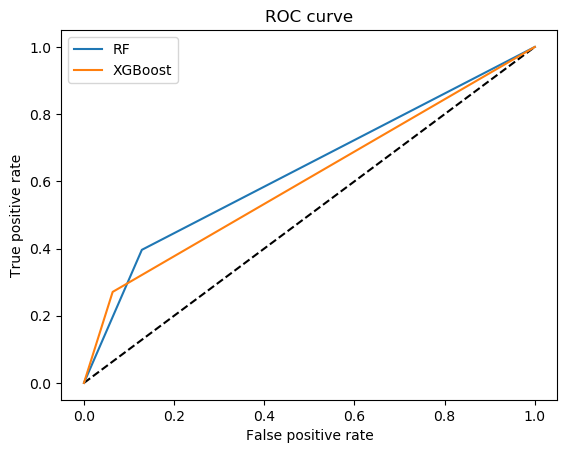

In [219]:
#Roc curves & AUC
print("AUC_rf : ", metrics.auc(rf_a, rf_b), '\n')
print("AUC_xgb : ", metrics.auc(xgb_a, xgb_b), '\n')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_a, rf_b, label='RF')
plt.plot(xgb_a, xgb_b, label='XGBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

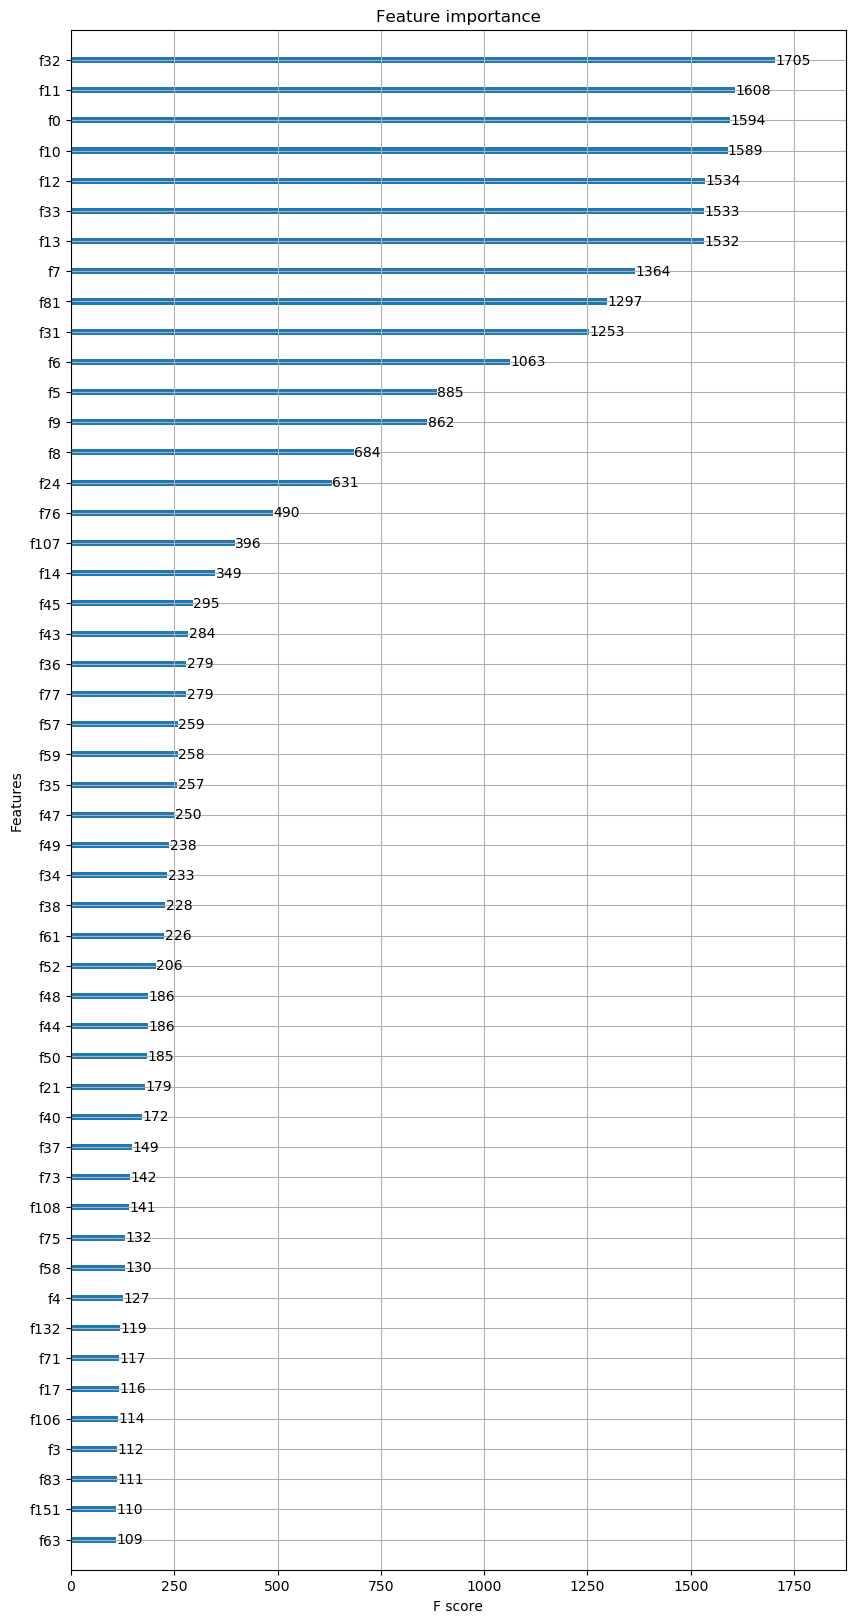

In [220]:
# Plot feature importance for XGBoost
ax = xgboost.plot_importance(xgb, max_num_features = 50)
fig = ax.figure
fig.set_size_inches(10, 20)
plt.show()

# MLFlow

In [ ]:
from random import random, randint
from mlflow import log_metric, log_param, log_artifacts

log_param("param1", randint(0, 100))

# Log a metric; metrics can be updated throughout the run
log_metric("foo", random())
log_metric("foo", random() + 1)
log_metric("foo", random() + 2)

# Log an artifact (output file)
if not os.path.exists("outputs"):
    os.makedirs("outputs")
with open("outputs/test.txt", "w") as f:
    f.write("hello world!")
log_artifacts("outputs")


MlflowException: Changing param values is not allowed. Param with key='param1' was already logged with value='55' for run ID='a2580ac732e8421288d558edf294d3d2'. Attempted logging new value '74'.

The cause of this error is typically due to repeated calls
to an individual run_id event logging.

Incorrect Example:
---------------------------------------
with mlflow.start_run():
    mlflow.log_param("depth", 3)
    mlflow.log_param("depth", 5)
---------------------------------------

Which will throw an MlflowException for overwriting a
logged parameter.

Correct Example:
---------------------------------------
with mlflow.start_run():
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 3)
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 5)
---------------------------------------

Which will create a new nested run for each individual
model and prevent parameter key collisions within the
tracking store.'

# Shap dataviz

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X.iloc[:1000,:])

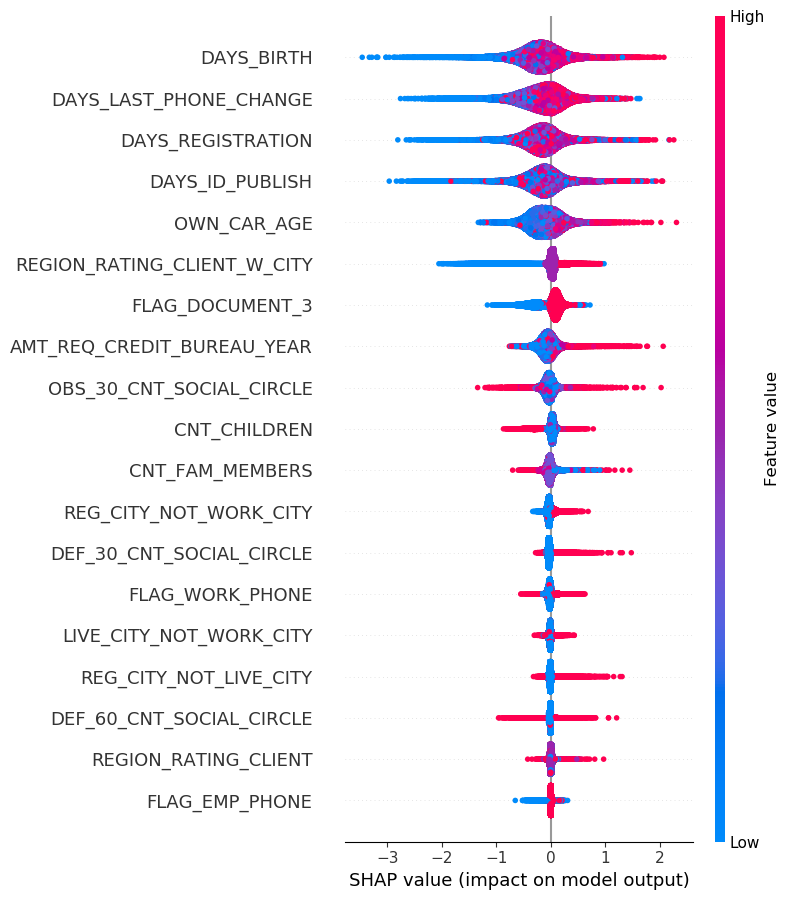

In [ ]:
shap.summary_plot(shap_values, X)